In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

In [14]:

K = input("Enter the number of clusters: ")
filename = os.path.join('images', input("Enter the file name: "))

In [15]:

loaded_image = Image.open(filename)
rgb_img = loaded_image.convert('RGB')
img = np.array(rgb_img)


In [16]:

X = img.reshape(-1, 3)
X.shape


(212018, 3)

In [17]:
X = X.astype(np.float32)

Iterações:  8
Inertia:  106319272.0


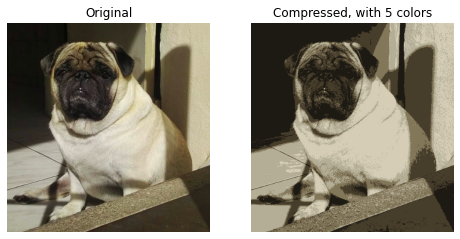

In [24]:
model = KMeans(n_clusters=int(K), random_state=0).fit(X)


# plot_data(X, labels, centroids, previous_centroids)
print("Iterações: ", model.n_iter_)
#print("Inertia: ", model.inertia_)

# ================== RESHAPE ================== #

# substitua a cor de cada pixel da imagem pelo centróide do cluster correspondente mostre 
# as duas imagens lado a lado.
centroids = model.cluster_centers_
label = model.labels_

image_rec = centroids[label].reshape(img.shape) 

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(np.clip(image_rec,0,255).astype(np.uint8))
plt.title('Compressed, with {} colors'.format(K))
plt.axis('off');